# Esame del 28/01/2020
Il datataset weather_train.csv (preso da kaggle -- https://www.kaggle.com/nicholasjhana/energyconsumption-generation-prices-and-weather) contiene dati relativi a rilevazioni meteo registrate
in città spagnole una volta al giorno secondo il seguente schema:
'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', ‘clouds_all', 'weather_id', 'weather_main',
'weather_description', 'weather_icon'
Il dataset è costituito da attributi con valori numerici e categorici.
L’obiettivo è quello di prevedere il tempo complessivo di una giornata (valore della feature
'weather_main') sulla base degli altri parametri.

# Parte 1: Analisi


# 1.
## Quanto sono le istanze contenute nel dataset ?
Le istanze sono il numero di colonne che sono -> 158131

## Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing values”)?
Si non ci sono
## Il dataset è bilanciato per quanto riguarda la classe da predire?
Non proprio perché:
- _cloud_ = 64130
- _clear_ = 77750
- _rain_ = 16251

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/weather_train.csv")
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [2]:
# verifico che non ci sono missing value:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [3]:
# come vedere se il dataset é bilanciato verso la classe target:
cloud =np.where(df["weather_main"] == "clouds")
len(cloud[0])

64130

In [4]:
clear =np.where(df["weather_main"] == "clear")
len(clear[0])

77750

In [5]:
rain =np.where(df["weather_main"] == "rain")
len(rain[0])

16251

# 2.
##  Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni? Eliminarle dal dataset
sono in totale 61 rilevazioni


In [6]:
pressure = np.where(df["pressure"] == 0)
len(pressure[0])

2

In [7]:
humidity = np.where(df["humidity"] == 0)
len(humidity[0])

59

In [8]:
# eliminare queste istanze
df = df.drop(humidity[0])
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [9]:
# poi dobbiamo ricalcolare  la pressure perché gli indici potrebbe essere diversi
pressure = np.where(df["pressure"] == 0)
df = df.drop(pressure[0])
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


# 3.
## Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un andamento simile a una gaussiana. Considerare poi le rilevazioni che si collocano all’interno del 5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni? Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni città?
No non é distribuito equamente le cittá perché Seville ha molte istanze presenti

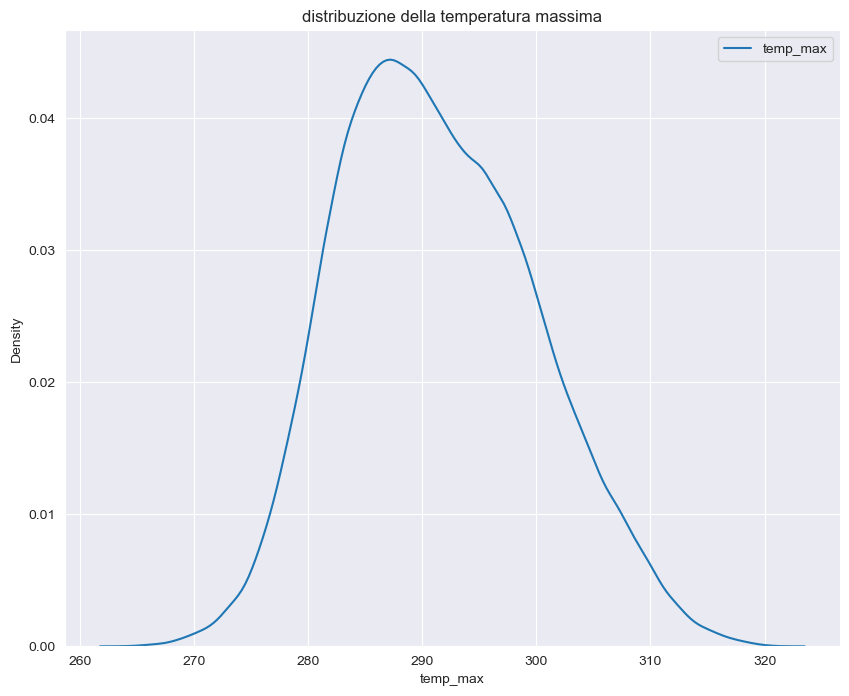

In [10]:
# potremmo vederlo graficamente se assomiglia ad una gaussiana
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della temperatura massima")

sns.kdeplot(df["temp_max"],ax=ax1, label ="temp_max")


plt.legend()

In [11]:
df['temp_max'].nlargest(n=7903).index

Int64Index([  4159, 140988,  18574,  31698,  51907, 102550, 104920, 113363,
            113639, 114977,
            ...
             14228,  14307,  14375,  14549,  14624,  14710,  14729,  14928,
             14974,  15124],
           dtype='int64', length=7903)

In [12]:
df_temp_max = df.loc[df['temp_max'].nlargest(n=7903).index]
df_temp_max

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
4159,2015-07-13 13:00:00+02:00,Seville,311.08,305.15,321.15,1018,31,1,240,0.0,0.0,0.0,0,800,clear,sky is clear,01d
140988,2015-07-13 12:00:00+02:00,Seville,310.12,303.15,321.15,1018,35,0,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
18574,2015-07-04 14:00:00+02:00,Seville,311.73,306.15,320.15,1018,19,1,140,0.0,0.0,0.0,0,800,clear,sky is clear,01d
31698,2016-07-24 13:00:00+02:00,Seville,311.64,306.15,320.15,1015,24,1,100,0.0,0.0,0.0,0,800,clear,sky is clear,01d
51907,2015-07-26 13:00:00+02:00,Seville,310.33,303.15,320.15,1015,26,1,0,0.0,0.0,0.0,0,800,clear,sky is clear,01d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,2018-08-04 18:00:00+02:00,Barcelona,306.15,306.15,306.15,1016,41,5,130,0.0,0.0,0.0,20,801,clouds,few clouds,02d
14729,2016-07-08 15:00:00+02:00,Madrid,305.06,304.15,306.15,1021,27,2,310,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14928,2017-07-01 19:00:00+02:00,Seville,305.76,305.15,306.15,1016,14,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14974,2018-07-10 14:00:00+02:00,Barcelona,304.15,302.15,306.15,1015,38,3,180,0.0,0.0,0.0,20,801,clouds,few clouds,02d


In [13]:
city = np.where(df_temp_max["city_name"] == "Seville")
len(city[0])

4614

visualizziamo perché é bello:

/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1589/2469803926.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Seville','count':len(city[0])},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1589/2469803926.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Madrid','count':1850},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1589/2469803926.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Bilbao','count':349},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1589/2469803926.py:5: FutureWarning: The frame.append method

Text(0.5, 0.98, 'distribuzione delle città piú calde')

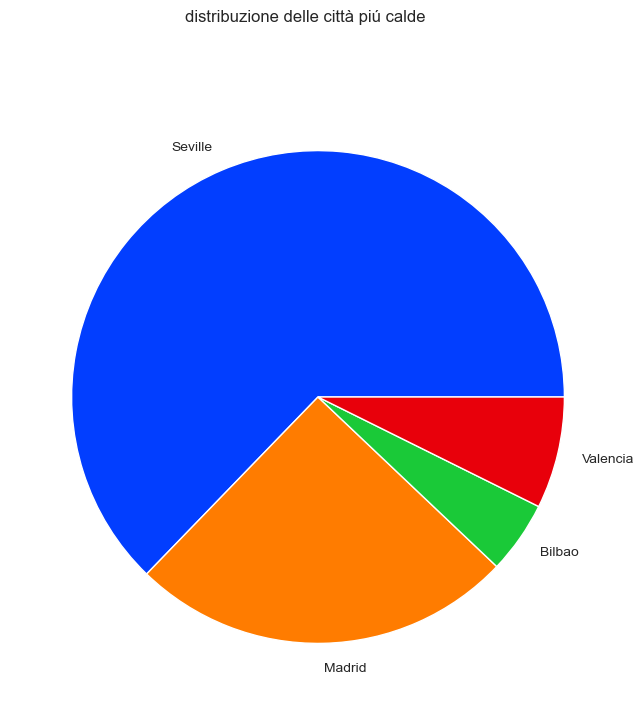

In [14]:
df_city = pd.DataFrame(columns=["city","count"])
df_city = df_city.append({'city':'Seville','count':len(city[0])},ignore_index=True)
df_city = df_city.append({'city':'Madrid','count':1850},ignore_index=True)
df_city = df_city.append({'city':'Bilbao','count':349},ignore_index=True)
df_city = df_city.append({'city':'Valencia','count':539},ignore_index=True)

fig,ax1= plt.subplots(ncols=1, figsize=(10, 8))

colors = sns.color_palette('bright')[0:4]
ax1.pie(df_city["count"],labels=df_city["city"],colors=colors)
fig.suptitle("distribuzione delle città piú calde")

In [15]:
seville = df_temp_max.loc[df_temp_max["city_name"] == "Seville"]
seville["weather_main"].describe()

count      4614
unique        3
top       clear
freq       3905
Name: weather_main, dtype: object

In [16]:
madrid = df_temp_max.loc[df_temp_max["city_name"] == "Madrid"]
madrid["weather_main"].describe()

count      1850
unique        3
top       clear
freq       1461
Name: weather_main, dtype: object

In [17]:
df_temp_max.loc[df_temp_max["city_name"] == "Barcelona"]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


In [18]:
bilbao = df_temp_max.loc[df_temp_max["city_name"] == "Bilbao"]
bilbao["weather_main"].describe()

count       349
unique        3
top       clear
freq        195
Name: weather_main, dtype: object

In [19]:
valencia = df_temp_max.loc[df_temp_max["city_name"] == "Valencia"]
valencia["weather_main"].describe()

count       539
unique        3
top       clear
freq        281
Name: weather_main, dtype: object

# 4.
## Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento (NOTA: il dataset riporta i valori in Kelvin)

In [20]:
df_snow = df.loc[(df["snow_3h"]  != 0)]
df_snow["temp"].describe()

count    216.000000
mean     276.118751
std        1.764093
min      272.399500
25%      274.806742
50%      276.356156
75%      276.941250
max      282.750000
Name: temp, dtype: float64

# 5.
## Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte

In [21]:
df_snow

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2600,2015-03-23 11:00:00+01:00,Bilbao,276.356000,276.356000,276.356000,1012,98,0,147,0.9,0.0,2.746,92,501,rain,moderate rain,10
2926,2015-01-20 04:00:00+01:00,Bilbao,275.203000,275.203000,275.203000,1012,97,1,198,0.3,0.0,0.200,88,500,rain,light rain,10
6250,2015-02-04 20:00:00+01:00,Bilbao,274.826656,274.826656,274.826656,1014,90,3,13,0.3,0.0,20.900,89,500,rain,light rain,10
10148,2015-02-08 16:00:00+01:00,Bilbao,277.219500,277.219500,277.219500,1031,82,2,21,0.3,0.0,0.200,78,500,rain,light rain,10
11016,2015-02-01 09:00:00+01:00,Bilbao,276.367344,276.367344,276.367344,1010,92,4,314,0.9,0.0,0.550,92,501,rain,moderate rain,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152628,2015-02-03 10:00:00+01:00,Bilbao,276.557500,276.557500,276.557500,1004,94,1,281,0.9,0.0,1.100,84,501,rain,moderate rain,10
153808,2015-02-02 03:00:00+01:00,Bilbao,276.382656,276.382656,276.382656,1012,96,1,250,0.3,0.0,0.050,84,500,rain,light rain,10
154633,2015-02-04 06:00:00+01:00,Bilbao,273.317000,273.317000,273.317000,1006,97,1,119,0.3,0.0,3.900,88,500,rain,light rain,10
157078,2015-01-22 10:00:00+01:00,Bilbao,277.648000,277.648000,277.648000,1013,96,2,343,3.0,0.0,2.700,92,502,rain,heavy intensity rain,10


In [22]:
snowing_dif = df_snow["temp_max"] - df_snow["temp_min"]
snowing_dif.describe()

count    216.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [23]:
hot_dif = df_temp_max["temp_max"] - df_temp_max["temp_min"]
hot_dif.describe()

count    7903.000000
mean        7.618640
std         6.453353
min         0.000000
25%         2.000000
50%         6.000000
75%        12.000000
max        33.330000
dtype: float64

# Parte 2: Trasformazione e Predizione

# 2.1
## Si vuole predire il valore di 'weather_main' sulla base degli attributi presenti nel dataset. Dividere il dataset in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”. Eliminare gli attributi ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"] Convertire l’attributo 'weather_main' in numerico in maniera opportuna.

In [26]:
y = df["weather_main"]
df = df.drop("weather_main",axis=1)
y

0         clouds
1          clear
2         clouds
3           rain
4          clear
           ...  
158126     clear
158127     clear
158128     clear
158129     clear
158130      rain
Name: weather_main, Length: 158070, dtype: object

In [39]:
df_train = df.iloc[:105380,]
df_test = df.iloc[105380:,]
df_test

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
105414,2017-09-01 04:00:00+02:00,Madrid,291.580,291.150,292.150,1019,63,3,350,0.0,0.0,0.0,20,801,few clouds,02n
105415,2017-11-19 05:00:00+01:00,Valencia,281.150,281.150,281.150,1021,81,2,300,0.0,0.0,0.0,40,802,scattered clouds,03n
105416,2016-11-20 17:00:00+01:00,Valencia,292.150,292.150,292.150,1009,42,2,240,0.0,0.0,0.0,20,801,few clouds,02d
105417,2018-12-02 06:00:00+01:00,Seville,279.940,279.150,281.150,1025,93,3,39,0.0,0.0,0.0,0,800,sky is clear,01n
105418,2015-06-21 22:00:00+02:00,Barcelona,295.093,295.093,295.093,1021,91,5,238,0.0,0.0,0.0,0,800,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,sky is clear,01


In [40]:
def Eliminate_cols(X, names):
    for name in names:
        X = X.drop(name,axis=1)
    return X

In [48]:
names =  ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"]
df_train = Eliminate_cols(df_train,names)
df_test = Eliminate_cols(df_test,names)
df_train

KeyError: "['dt_iso'] not found in axis"

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
y = encoder.fit_transform(y)
y_training = y[:105380]
y_testing = y[105380:]
y_testing

array([1, 1, 1, ..., 0, 0, 2])

## Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion matrix.

In [80]:
from sklearn.utils.multiclass import unique_labels
class_names = ["clouds","clear","rain"]
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


accuracy of DT :  0.6946289618523439
Confusion matrix, without normalization
[[8943 4025    0]
 [4020 6611    0]
 [   0    0 2746]]
accuracy of LR :  0.5724425887265135
Confusion matrix, without normalization
[[9480 3461   27]
 [5090 5503   38]
 [ 676 1972   98]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


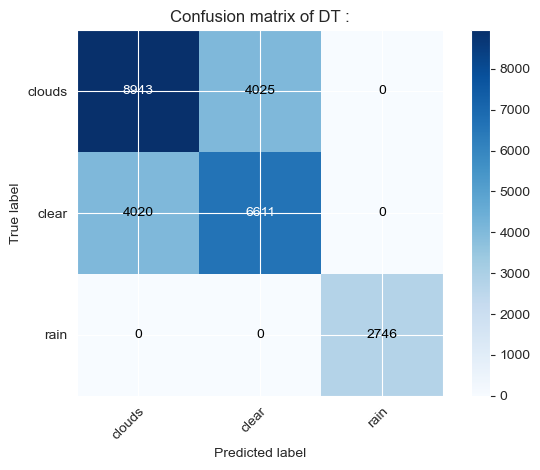

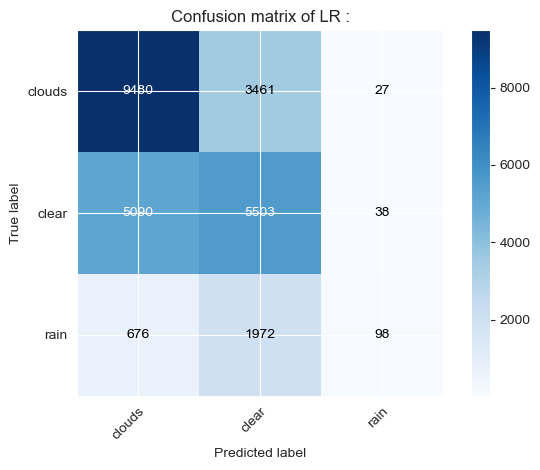

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(df_train, y_training,random_state=0)

classifier = [DecisionTreeClassifier(),LogisticRegression()]
names = ["DT","LR"]

for name,model in zip(names,classifier):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    print('accuracy of '+ name +' : ',score)
    plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of '+name+' :')

accuracy of DT :  0.6763075988764898
Confusion matrix, without normalization
[[4330 2074    0]
 [2190 3233    0]
 [   0    0 1346]]
accuracy of LR :  0.5477112275108176
Confusion matrix, without normalization
[[4498 1813   93]
 [2778 2528  117]
 [ 248  909  189]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


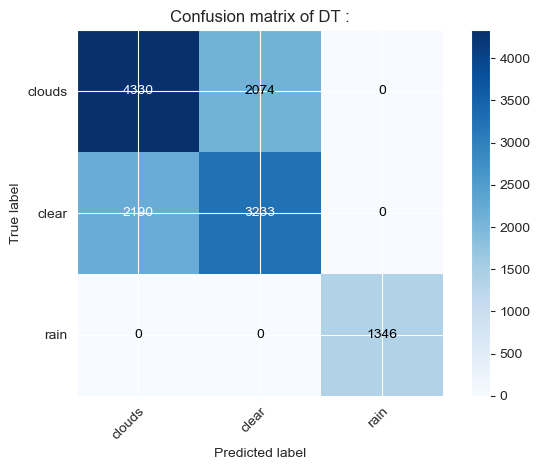

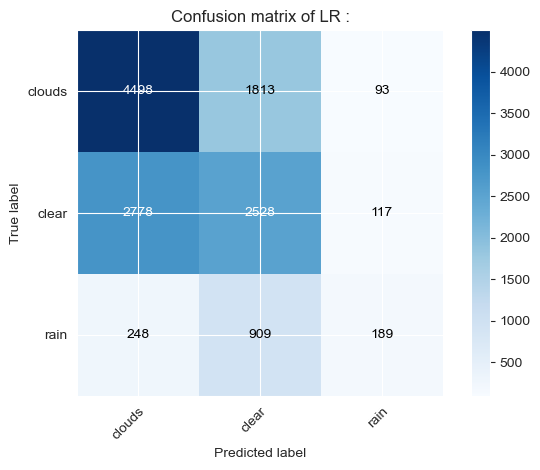

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_test, y_testing,random_state=0)


for name,model in zip(names,classifier):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    print('accuracy of '+ name +' : ',score)
    plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of '+name+' :')

## Considerazioni:
1. L'accuratezza dei due classificatore potrebbe essere cosí bassa perché comunque stiamo analizzando dataset non ancora normalizzati, quindi i valori non sono ancora tutti nella stessa scala
2. stiamo compiendo un train e un test non del tutto corretto perché avremo dovuto dividere in modo randomico le 2/3 parti in train e in test
3. il test e il train non cambiano quasi nulla in questo stato
4. Il DT nella confusion metrix predice perfettamente quando c'é pioggia

# 2.2
## Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con un una 10 Fold cross validation

In [86]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro','accuracy']
save_score = {}
for name,model in zip(names,classifier):
    scores = cross_validate(model,df_train,y_training,scoring= scoring,cv=10)
    save_score[name] = scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [89]:
save_score['DT']

{'fit_time': array([0.38, 0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.37, 0.38, 0.38]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_precision_macro': array([0.78, 0.77, 0.77, 0.77, 0.77, 0.78, 0.77, 0.77, 0.77, 0.77]),
 'test_recall_macro': array([0.78, 0.77, 0.77, 0.77, 0.77, 0.78, 0.77, 0.77, 0.77, 0.77]),
 'test_accuracy': array([0.7 , 0.69, 0.7 , 0.69, 0.7 , 0.7 , 0.69, 0.69, 0.7 , 0.7 ])}

In [90]:
save_score['LR']

{'fit_time': array([1.3 , 1.3 , 1.24, 1.24, 1.29, 1.21, 1.29, 1.34, 1.27, 1.29]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_precision_macro': array([0.54, 0.44, 0.51, 0.55, 0.54, 0.53, 0.47, 0.48, 0.55, 0.51]),
 'test_recall_macro': array([0.45, 0.42, 0.43, 0.43, 0.42, 0.43, 0.42, 0.43, 0.43, 0.44]),
 'test_accuracy': array([0.57, 0.57, 0.57, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.56])}

# 2.3
## Utilizzare la funzione Normalizer per normalizzare i valori del dataset e confrontare se l’accuratezza ottenuta con il Decision Tree Classifier migliora

In [91]:
from sklearn.preprocessing import Normalizer
dt = classifier[0]
norma = Normalizer()
df_train_norma = norma.fit_transform(df_train)
df_train_norma

array([[2.55e-01, 2.52e-01, 2.57e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.73e-01, 2.73e-01, 2.73e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.51e-01, 2.51e-01, 2.51e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.46e-01, 2.43e-01, 2.51e-01, ..., 2.55e-04, 0.00e+00, 0.00e+00],
       [2.61e-01, 2.60e-01, 2.63e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.57e-01, 2.55e-01, 2.59e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [92]:
scores = cross_validate(dt,df_train_norma,y_training,scoring= scoring,cv=10)
scores

{'fit_time': array([0.91, 0.89, 0.89, 0.89, 0.88, 0.9 , 0.89, 0.88, 0.9 , 0.89]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_precision_macro': array([0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]),
 'test_recall_macro': array([0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]),
 'test_accuracy': array([0.68, 0.68, 0.68, 0.68, 0.68, 0.69, 0.68, 0.68, 0.68, 0.68])}

# 2.4
## Creare una pipeline con trasformatori PCA (si scelgano 5 attributi) e poi Normalizer. Si usi come modello il Decision Tree Classifier
## Extra: gli attributi della PCA vengono aggiunti agli attributi del dataset

In [93]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
combine_features = FeatureUnion([("pca",pca), ("normalizer",norma)])

pipeline = Pipeline(steps=[("combine_features",combine_features),
                           ("model",dt)],verbose=True)

pipeline

Pipeline(steps=[('combine_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('normalizer', Normalizer())])),
                ('model', DecisionTreeClassifier())],
         verbose=True)

# 2.5
## Utilizzare la funzione di gridSearchCV sulla pipeline per modificare il numero di attributi selezionati dalla PCA e alcuni parametri a piacere del classificatore. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 2.1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pac

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s
{'combine_features__pca__n_components': 5, 'model__criterion': 'entropy', 'model__min_samples_split': 2, 'model__splitter': 'best'}
accuracy of  :  0.6732710847946557
Confusion matrix, without normalization
[[4273 2131    0]
 [2173 3250    0]
 [   0    0 1346]]


<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

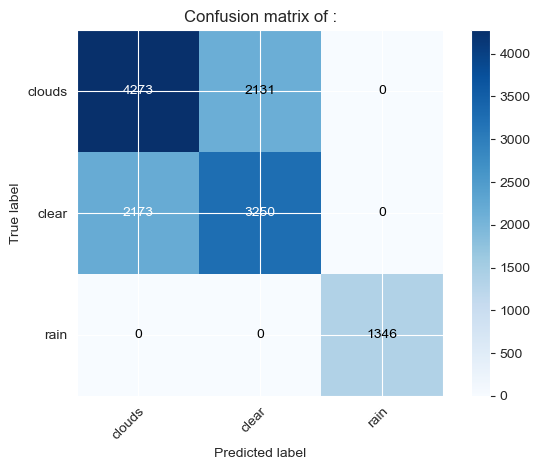

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df_test, y_testing,random_state=0)
from sklearn.model_selection import GridSearchCV
params = {'model__criterion':["gini", "entropy", "log_loss"],
          'model__splitter':["best","random"],
          'model__min_samples_split':[2,1,4],
          'combine_features__pca__n_components':[2,5,3]}
gs = GridSearchCV(pipeline,params,n_jobs=-1)

gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(gs.best_params_)
score = accuracy_score(y_test,pred)
print('accuracy of  : ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of :')

# 2.6
## Si verifichi l’accuratezza ottenuta dalla pipeline del punto 4 con il file weather_test. I risultati corretti sono nel file class.csv. Controllare le features presenti nei dataset.

In [98]:
weather_test = pd.read_csv("Data/weather_test.csv")
weather_test

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
0,0,2015-10-23 18:00:00+02:00,Madrid,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,0,800,sky is clear,01d
1,1,2015-01-01 06:00:00+01:00,Madrid,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,0,800,sky is clear,01n
2,2,2015-07-24 22:00:00+02:00,Madrid,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0,0,800,sky is clear,01n
3,3,2015-05-27 22:00:00+02:00,Madrid,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0,0,800,sky is clear,01n
4,4,2015-07-06 18:00:00+02:00,Madrid,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0,20,801,few clouds,02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2016-11-15 09:00:00+01:00,Seville,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0,0,800,sky is clear,01d
9996,9996,2017-12-03 04:00:00+01:00,Seville,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0,0,800,sky is clear,01n
9997,9997,2016-05-23 22:00:00+02:00,Valencia,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0,0,800,sky is clear,01n
9998,9998,2018-06-19 09:00:00+02:00,Seville,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0,0,800,sky is clear,01d


In [100]:
names =  ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all","Unnamed: 0"]
weather_test = Eliminate_cols(weather_test,names)

In [101]:
weather_test

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h
0,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0
1,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0
2,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0
3,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0
4,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0
9996,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0
9997,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0
9998,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0


In [105]:
y = pd.read_csv("Data/class.csv")
y = y.drop("Unnamed: 0",axis=1)
y

,weather_main
0,clear
1,clear
2,clear
3,clear
4,clouds
...,...
9995,clear
9996,clear
9997,clear
9998,clear


In [106]:
y = encoder.fit_transform(y)
y

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
{'combine_features__pca__n_components': 3, 'model__criterion': 'entropy', 'model__min_samples_split': 4, 'model__splitter': 'best'}
accuracy of  :  0.6548
Confusion matrix, without normalization
[[791 423   0]
 [440 552   0]
 [  0   0 294]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pac

<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

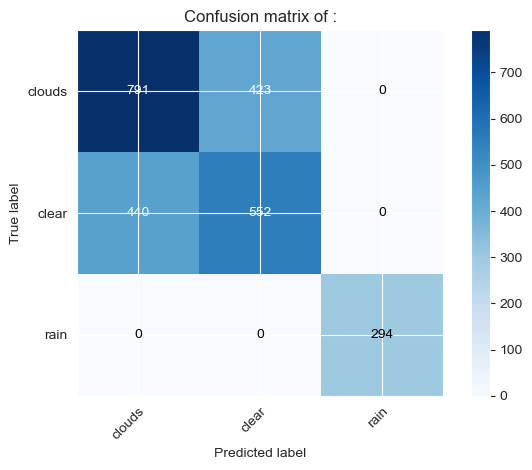

In [107]:
X_train, X_test, y_train, y_test = train_test_split(weather_test, y,random_state=0)
gs = GridSearchCV(pipeline,params,n_jobs=-1)

gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(gs.best_params_)
score = accuracy_score(y_test,pred)
print('accuracy of  : ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of :')

# 2.7
## Si sperimenti una pipeline come quella del punto 4 dove al posto del classificatore si utilizzi un regressore lineare. Il risultato dovrà essere approssimato all’intero per il calcolo dell’accuratezza

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


LogisticRegression()

In [109]:
pipeline_lr = Pipeline(steps=[("combine_features",combine_features),
                           ("model",lr)],verbose=True)

pipeline_lr

Pipeline(steps=[('combine_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('normalizer', Normalizer())])),
                ('model', LogisticRegression())],
         verbose=True)

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
rounded accuracy of  :  0.516
Confusion matrix, without normalization
[[956 232  26]
 [643 321  28]
 [ 91 190  13]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

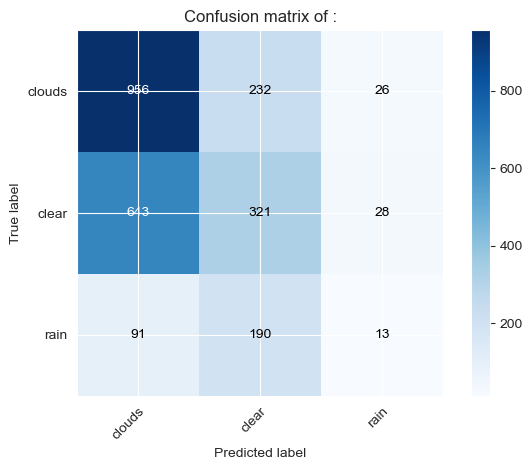

In [110]:
X_train, X_test, y_train, y_test = train_test_split(weather_test, y,random_state=0)
gs = GridSearchCV(pipeline,params,n_jobs=-1)

pipeline_lr.fit(X_train,y_train)
pred = pipeline_lr.predict(X_test)
score = accuracy_score(y_test,np.round(pred))
print('rounded accuracy of  : ',score)
plot_confusion_matrix(y_test, np.round(pred), classes=class_names, title='Confusion matrix of :')